In [1]:
import os

import matplotlib.pyplot as plt
import neptune
from skimage.io import imread

Get the best `run-id`

In [ ]:
project = neptune.init_project(project="common/project-images-segmentation")

# (Neptune) find best run for given data version
best_run_df = project.fetch_runs_table(tag="best").to_pandas()
best_run_id = best_run_df["sys/id"].values[0]

Load the best run in `read-only` mode

In [ ]:
run = neptune.init_run(
    source_files=None,
    with_id=best_run_id,
    mode="read-only",
)

Fetch Train Loss for the run and plot it

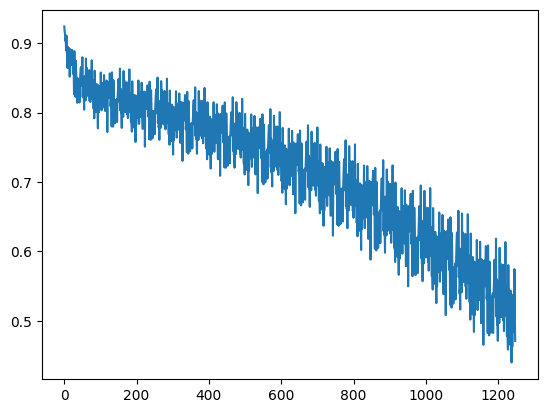

In [8]:
train_loss = run["training/metrics/train_dice_loss"]
train_loss_df = train_loss.fetch_values()
plt.plot(train_loss_df.step, train_loss_df.value);

Fetch Hyperparams

In [9]:
hyper_params = run["training/hyper_params"].fetch()
print(hyper_params)

{'batch_size': 32, 'epochs': 12, 'lr': 0.0001}


Plot evolution of Model Prediction on a Validation Image

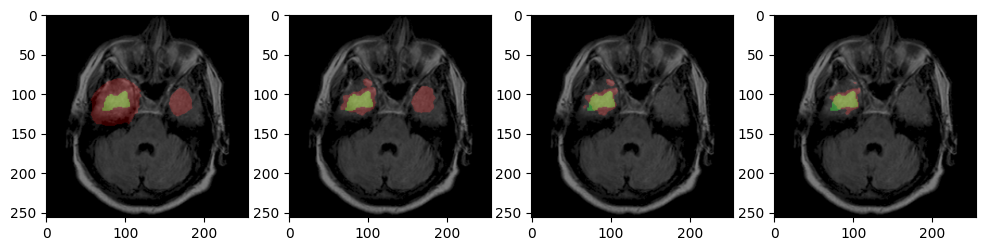

In [12]:
validation_pred_evolve = run["training/validation_prediction_progression/TCGA_CS_4944_20010208_6"]
download_dir = "valid_mask_evolution"
validation_pred_evolve.download(download_dir)

# plot only 1st 5
files = os.listdir(download_dir)[:5]
_, ax = plt.subplots(1, len(files), figsize=(12, 12))

for idx, img_file in enumerate(files):
    ax[idx].imshow(imread(f"{download_dir}/{img_file}"))